#Bank Churn prediction
 
### **Context**:

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### **Objective**:

Let us consider you are working as Data scientist with the  bank and you need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### **Data Dictionary**:

The case study is from an open-source dataset from Kaggle.The dataset contains 10,000 sample points with 14 distinct features as follows:

CustomerId: Unique ID which is assigned to each customer

Surname: Last name of the customer
 
CreditScore: It defines the credit history of the customer.
  
Geography: A customer’s location 
   
Gender: It defines the Gender of the customer
   
Age: Age of the customer 
    
Tenure: Number of years for which the customer has been with the bank

NumOfProducts: refers to the number of products that a customer has purchased through the bank.

Balance: Account balance

HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

EstimatedSalary: Estimated salary 

isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

Excited : whether or not the customer left the bank within six month. It can take two values 

0=No ( Customer did not leave the bank )
1=Yes ( Customer left the bank )



In [ ]:
!pip install tensorflow

In [1]:
#importing tensorflow and checking its version
import tensorflow as tf
print(tf.__version__)
from numpy.random import seed
seed(1)


2.4.1


In [4]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from keras.layers import Dense, Input, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np



In [5]:
from google.colab import files
files.upload()

Saving bank.csv to bank (1).csv


{'bank.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,34,10,0,2,1

#### Read the dataset

In [6]:
ds = pd.read_csv("bank.csv")

In [7]:
ds.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


#### Drop the columns which are unique for all users like IDs

In [8]:
ds['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* As you can see, there are no null values in any of the column of this dataset

##Exploratory Data Analysis

Here our main interest is to get an understanding as to how the given attributes relate to the 'Exit' status.

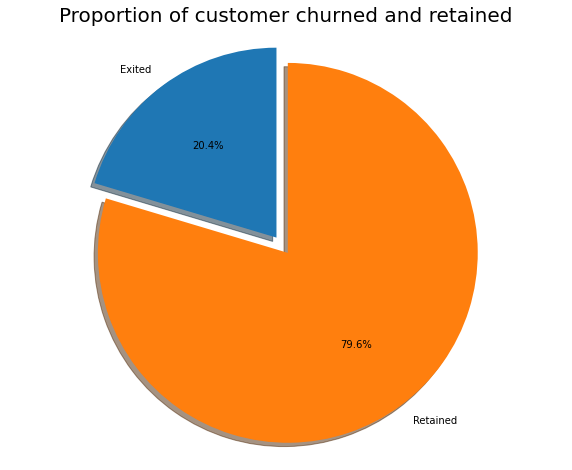

In [11]:
labels = 'Exited', 'Retained'
sizes = [ds.Exited[ds['Exited']==1].count(), ds.Exited[ds['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

* About 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained

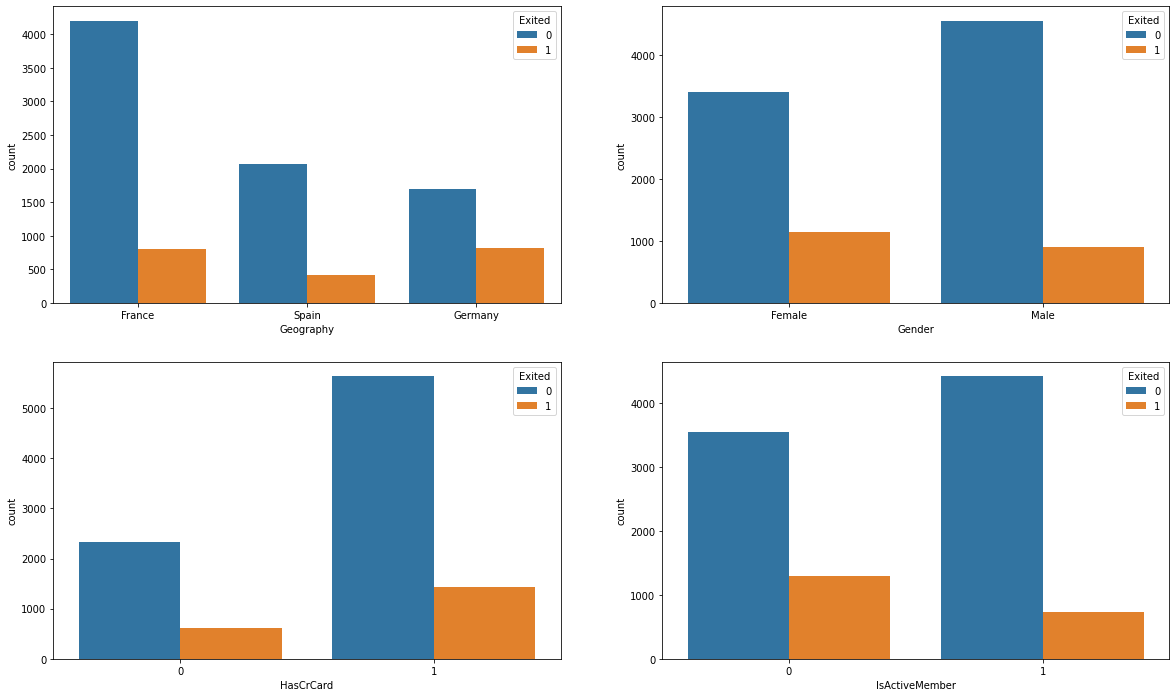

In [ ]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = ds, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = ds, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = ds, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = ds, ax=axarr[1][1])

We note the following:

*  Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.

* The proportion of female customers churning is also greater than that of male customers
Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.


* Unsurprisingly the inactive members have a greater churn. 
Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn

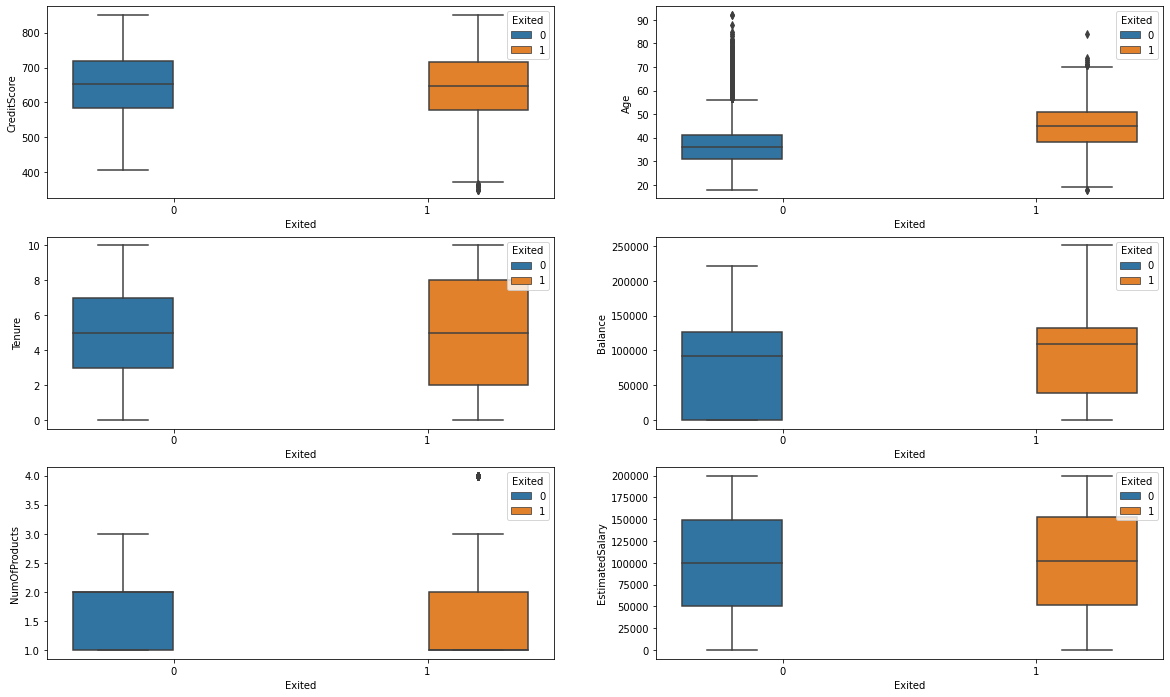

In [ ]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = ds , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[2][1])

We note the following:

* There is no significant difference in the credit score distribution between retained and churned customers.
The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups

* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.

* Neither the product nor the salary has a significant effect on the likelihood to churn

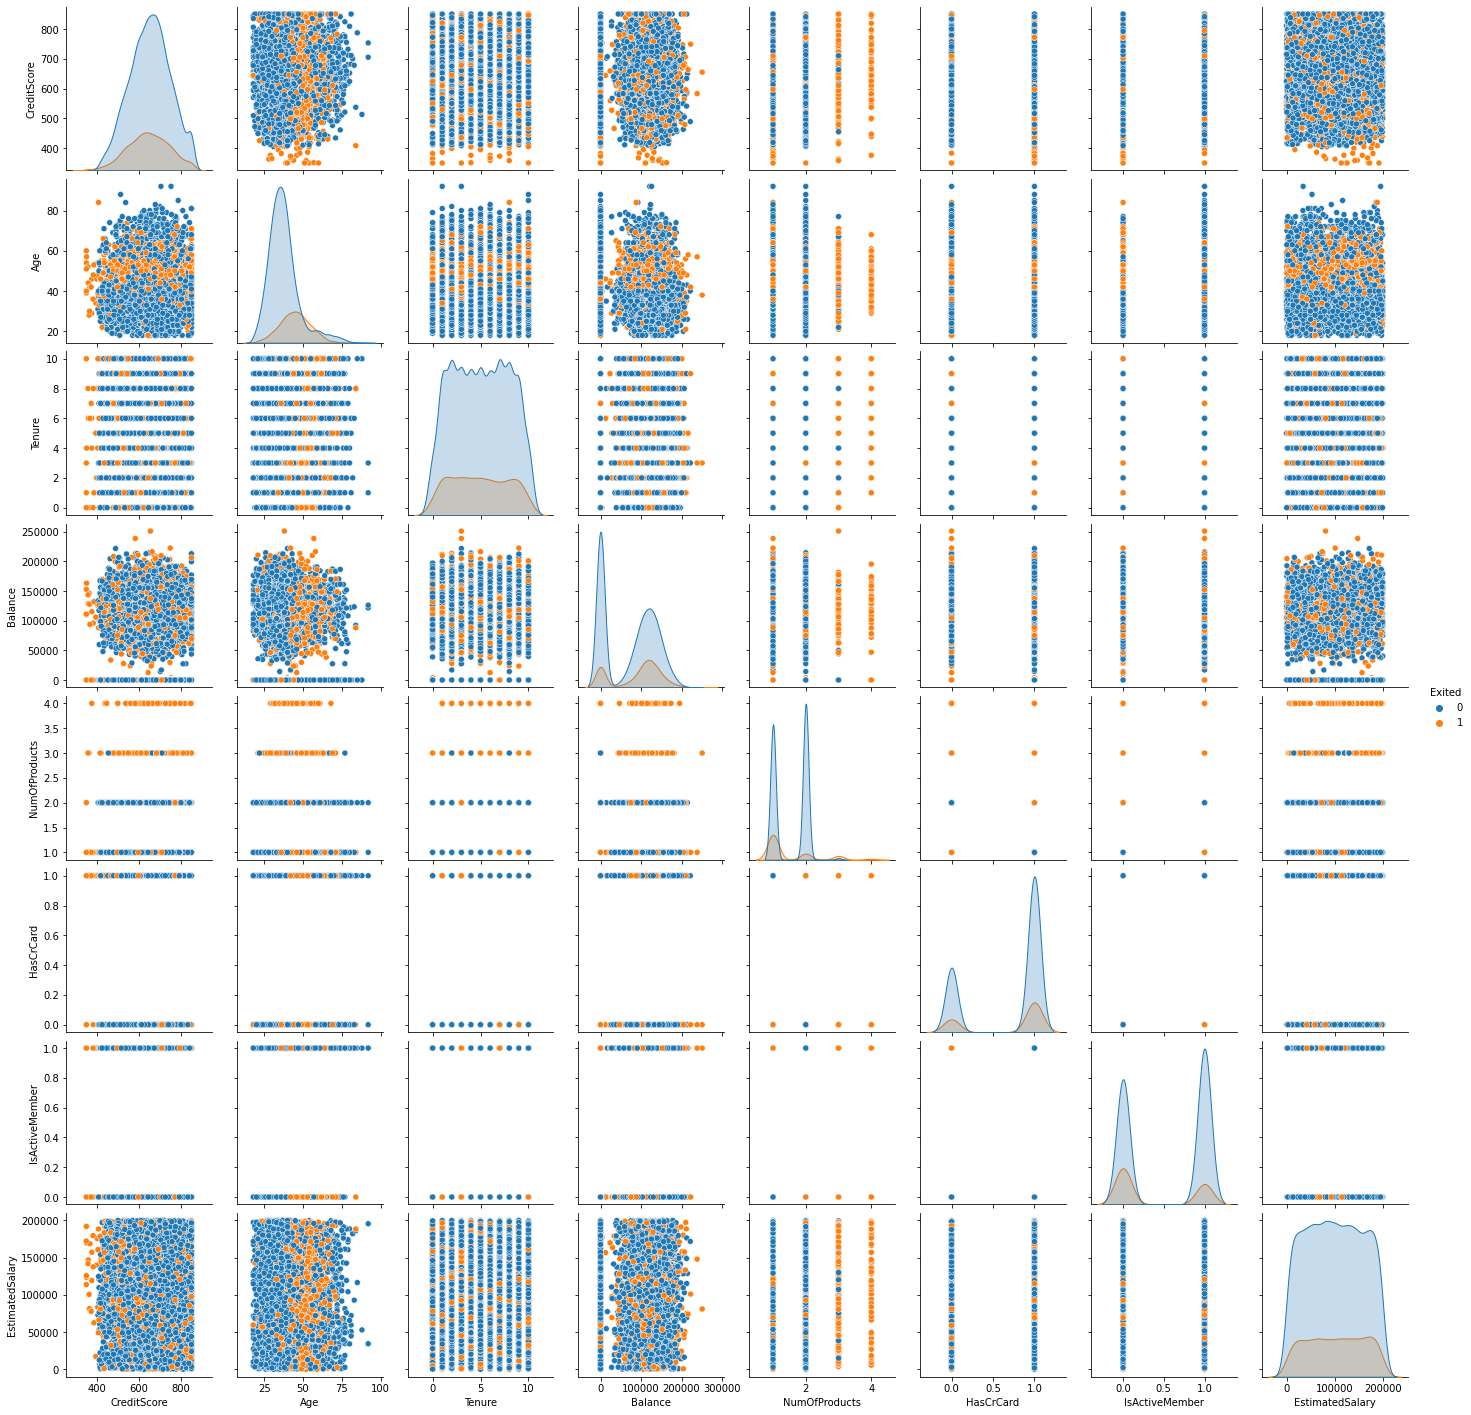

In [ ]:
sns.pairplot(ds, diag_kind = 'kde', hue = 'Exited')

**Insights :** 
* No correlation observed between the  columns

* Exited Customers seem to be distributed across all Credit Scores

* Lot of Customers customers aged between 40-60 seem to have exited the bank 

* Lot of  customers with 3-4 products seem to have exited the bank

* Customers with or without credit cards seem to have exited the bank

* Lot of  customers who are non active members seem to have exited the bank

* Customers across all Estimated Salaries seem to have exited the bank uniformly

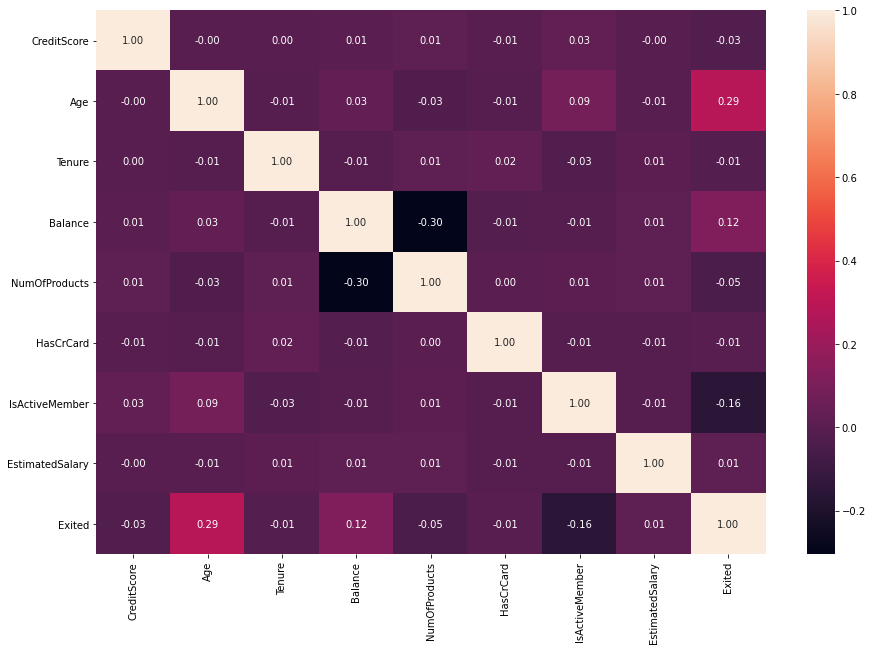

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(ds.corr(), annot = True, fmt = '0.2f')

**Insights :** None of the columns are strongly corelated with each other. There is no multicollinearity.

#### Distinguish the feature and target set

In [12]:
X = ds.iloc[:,0:10].values # Credit Score through Estimated Salary
y = ds.iloc[:,10].values # Exited

##Categorical Encoding

In [13]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
print(X[:8,1], '... will now become: ')

label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print(X[:8,1])

['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany'] ... will now become: 
[0 2 0 0 2 2 0 1]


In [14]:
# We will do the same thing for gender. this will be binary in this dataset
print(X[:6,2], '... will now become: ')

label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:6,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 
[0 0 0 0 0 1]


In [15]:
# The Problem here is that we are treating the countries as one variable with ordinal values (0 < 1 < 2). 
# Therefore, one way to get rid of that problem is to split the countries into respective dimensions.
# Gender does not need this as it is binary

# Converting the string features into their own dimensions. Gender doesn't matter here because its binary
#countryhotencoder = OneHotEncoder(categories = [1]) # 1 is the country column
countryhotencoder = ColumnTransformer([("countries", OneHotEncoder(), [1])], remainder="passthrough")
X = countryhotencoder.fit_transform(X)
#X = countryhotencoder.fit_transform(X).toarray()

In [16]:
#Printing the shape of the data 
X.shape

(10000, 12)

In [17]:
#Printing the data
X 

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [18]:

# A 0 on two countries means that the country has to be the one variable which wasn't included 
# This will save us from the problem of using too many dimensions
X = X[:,1:] # Got rid of Spain as a dimension.

#### Divide the data set into Train and test sets

In [230]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#### Normalize the train and test data

In [231]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Initialize & build the model

In [ ]:
# Initializing the ANN
classifier = Sequential()

In [ ]:
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(activation = 'relu', input_dim = 11, units=64))

In [ ]:
#Add 1st hidden layer
classifier.add(Dense(32, activation='relu'))

In [ ]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid')) 

In [ ]:
# Create optimizer with default learning rate
# Compile the model
classifier.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=classifier.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=100,
          batch_size=32)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.2048 - accuracy: 0.7423 - val_loss: 0.1716 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.7922 - val_loss: 0.1613 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.8033 - val_loss: 0.1563 - val_accuracy: 0.7969
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.1570 - accuracy: 0.7941 - val_loss: 0.1524 - val_accuracy: 0.7969
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.1547 - accuracy: 0.7903 - val_loss: 0.1492 - val_accuracy: 0.7969
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1474 - accuracy: 0.7979 - val_loss: 0.1466 - val_accuracy: 0.7987
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1424 - accuracy: 0.8012 - val_loss: 0.1443 - val_accuracy: 0.8019

63/63 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.8615


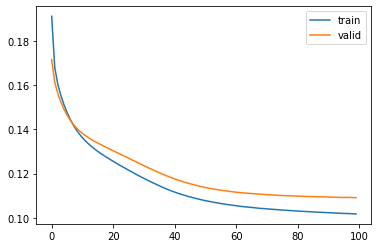

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = classifier.evaluate(X_test, y_test)

Validation and training *Loss* is decreasing smoothly. There is no noise in the training. Sometimes, Loss function fluctuates a lot during training which makes the convergence slow. These fluctions are due to the noisy updates in the parameters. Validation and test Accuracy also seems to be fine. Let's check other metrices



Let's Plot confusion matrix 

In [46]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

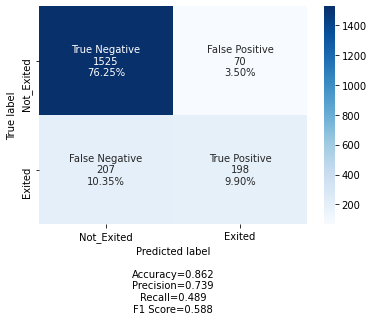

In [ ]:
#Calculating the confusion matrix 
y_pred1=classifier.predict(X_test)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## Model evaluation criterion

### Model can make wrong predictions as:
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

### Which case is more important? 
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers. 

### How to reduce this loss i.e need to reduce False Negative?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

As you can see, the above model has good accuracy and precision but have poor recall. There can be two reasons as follows:

1) **Imbalanced dataset:** As you have seen in the EDA, This dataset is imbalanced and it contains more examples belong to non_exited class (0).

2) **Inappropriate loss function:** We're using MSE loss function which is not appropriate for the classification problem because it tries to minimize the mean ( Central value ) and here the dataset is imbalanced and mean is more biased towards 0th class.

3) **Decision Threshold** As you see this dataset is imbalance. Therefore, we can use ROC-AUC to find the optimal threshold and use the same for prediction.

Lets try to  change the loss function, tune the decision threshold, apply SMOTE to balance the dataset and   configure some other hyperparameters accordingly 

**Changing the loss function to binary_crossentropy which is used for binary classification**

In [19]:
def create_model():
      #Initializing the neural network
      model = Sequential()
      #Adding the hidden and output layers
      model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
      model.add(Dense(32,activation='relu'))
      model.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with RMSprop optimizer and binary cross entropy loss function 
      optimizer = tf.keras.optimizers.Adam(0.001)
      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
      return model

In [20]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Fitting the ANN with batch_size = 32 and 100 epochs 
history = model.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5074 - accuracy: 0.7504 - val_loss: 0.3979 - val_accuracy: 0.8350
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8485 - val_loss: 0.3660 - val_accuracy: 0.8487
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8518 - val_loss: 0.3557 - val_accuracy: 0.8531
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8686 - val_loss: 0.3503 - val_accuracy: 0.8544
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8611 - val_loss: 0.3508 - val_accuracy: 0.8519
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8672 - val_loss: 0.3481 - val_accuracy: 0.8456
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8596 - val_loss: 0.3453 - val_accuracy: 0.8537

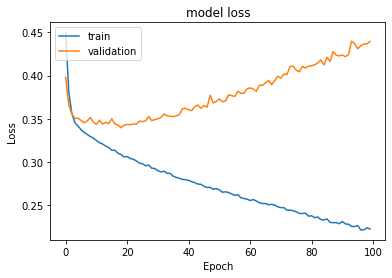

In [22]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


As you can see from the above image, this model is severely overfitting. Deep learning models are very senstive to overfititng due to large amount of parameters. We need to find the optimal point where the training should be stopped. 

The best solution for the above problem is **Early stopping**.

**Early stopping:** 

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

In [23]:
#Importing classback API
from keras import callbacks 
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
model_e=create_model()
#Fitting the ANN with batch_size = 32 and 100 epochs 
history_e = model_e.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_split = 0.2,callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5126 - accuracy: 0.7767 - val_loss: 0.4104 - val_accuracy: 0.8294
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8302 - val_loss: 0.3763 - val_accuracy: 0.8494
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8520 - val_loss: 0.3548 - val_accuracy: 0.8531
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8597 - val_loss: 0.3493 - val_accuracy: 0.8556
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8631 - val_loss: 0.3444 - val_accuracy: 0.8562
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8562 - val_loss: 0.3426 - val_accuracy: 0.8575
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8618 - val_loss: 0.3409 - val_accuracy: 0.8587

Lets plot the loss function again

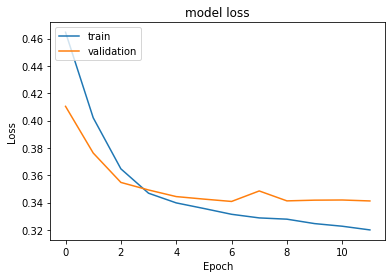

In [24]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


As you can see from the above graph, Training is stopped at the appropriate epoch because after that, loss function started to increase. Therefore, Early stopping prevents the overfitting

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Best Threshold=0.234022, G-Mean=0.730


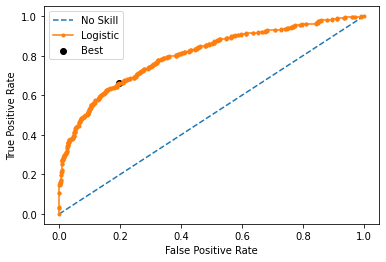

In [31]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [32]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_test)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

Accuracy, Precision, Recall, and F1-Scores

In [33]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1607
           1       0.52      0.70      0.60       393

    accuracy                           0.82      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.82      0.83      2000



Printing Confusion matrix

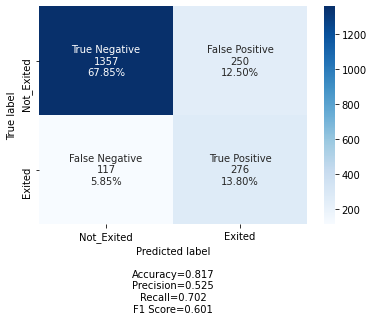

In [34]:
#Calculating the confusion matrix 

cm1=confusion_matrix(y_test, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

As you can see, the recall of the model is changed but accuracy got decreased. Let's try hyperparameter tuning to get the better model

We can name  this model as model_e ( model with earlystopping ) 



##Hyperparameter Optimization

Some important parameters to look out for while optimizing neural networks are:

-Type of architecture

-Number of Layers

-Number of Neurons in a layer

-Regularization parameters

-Learning Rate

-Type of optimization / backpropagation technique to use

-Dropout rate

-Weight sharing

##### Number of Layers:
We will keep it similar to the above model so that we can compare the accuracy.
1 hidden layer.

##### Activation:
input layer: relu becasue we are in an input layer. uses the ReLu activation function for  ϕ
output layer: sigmoid becasue we are in an output layer. uses the Sigmoid activation function for  ϕ . This is used instead of the ReLu function becasue it generates probabilities for the outcome. We want the probability that each customer leaves the bank.

##### Type of optimization / backpropagation technique to use: 
We will use Adam. Adam is a very efficeint variation of Stochastic Gradient Descent. For Adam and its variant, learning rate or the decay rate does not really matter too much.

##### Learning Rate:
default learning rate 0.001.

##### Number of Neurons in a layer:
We will keep it 6 as per our initial calculation above.

##### Weight sharing / kernel_initializer: 
uniform the distribution with which we randomly initialize weights for the nodes in this layer.

##### Loss:
loss: binary_crossentropy This is the loss function used within adam. This should be the logarthmic loss. If our dependent (output variable) is Binary, it is binary_crossentropy. If Categorical, then it is called categorical_crossentropy

Rebuilding the model using these optimised parameters


Let's try to use drop out to reduce  overfitting. Here, we will not be using earlystopping because earlystopping also have some drawbacks. We should try using it with the complex models

In [259]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):  
    np.random.seed(1337)
    model = Sequential()
    # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))
    #Adding dropout layer
    model.add(Dropout(0.5))
    # # Adding the hidden layer
    # Notice that we do not need to specify input dim. 
    model.add(Dense(layer_2,activation='relu'))
    # # Adding the output layer
    # Notice that we do not need to specify input dim. 
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

##Using Grid search

We are using grid search to optimize thwo hyperparameters called **batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [260]:
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1)

In [261]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1],
   
    
   
    
}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [262]:
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   18.9s finished


160/160 [==============================] - 1s 5ms/step - loss: 0.4823 - accuracy: 0.7812 - val_loss: 0.3717 - val_accuracy: 0.8506
Best: 0.834375 using {'batch_size': 40, 'lr': 0.01}


* Best model is with the following configuration:  ( It may vary each time code runs )

**Result of Grid Search**

{'batch_size': 40, 'learning_rate":0.01}

**Heuristic for Hyperparameters**

optimizer="adam", layer1_units=64, layer2_units = 32



##Let's create the final model with above mentioned configuration

In [264]:
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])

estimator_v2.summary()


Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 64)                768       
_________________________________________________________________
dropout_50 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_142 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [265]:

history_h=estimator_v2.fit(X_train, y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4881 - accuracy: 0.7898 - val_loss: 0.3669 - val_accuracy: 0.8537
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8425 - val_loss: 0.3563 - val_accuracy: 0.8569
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.8463 - val_loss: 0.3570 - val_accuracy: 0.8512
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8447 - val_loss: 0.3471 - val_accuracy: 0.8537
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8493 - val_loss: 0.3561 - val_accuracy: 0.8519
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8627 - val_loss: 0.3432 - val_accuracy: 0.8612
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8523 - val_loss: 0.3476 - val_accuracy: 0.8562

Plotting the validation and training loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'middle'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


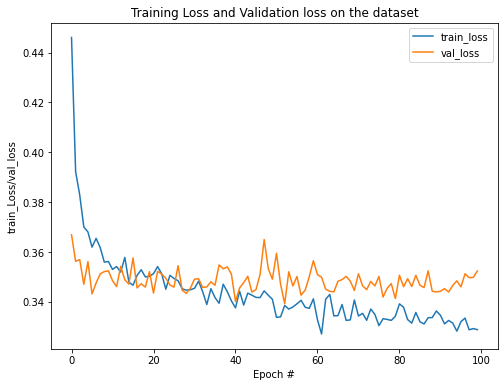

In [266]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="middle")
plt.show()

As you can seen , the above model's validation curve does not have high slope which means it has  not decreased much. Let's check other metrices to understand how this model works 

###Tuning the threshold

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Best Threshold=0.183667, G-Mean=0.785


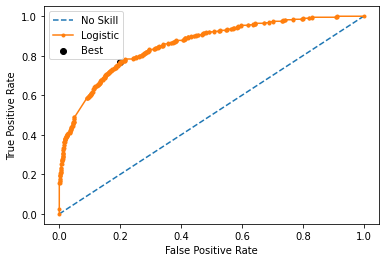

In [269]:

# predict probabilities
yhat = estimator_v2.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#### Predict the results using  the best  threshold

In [270]:
y_pred_h = estimator_v2.predict(X_test)
print(y_pred_h)

[[0.02311292]
 [0.0135802 ]
 [0.10573146]
 ...
 [0.6955534 ]
 [0.19994804]
 [0.2296083 ]]


In [271]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. 
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


In [272]:
#lets print classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1607
           1       0.48      0.77      0.59       393

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.85      0.79      0.81      2000



#### Print the  confusion matrix

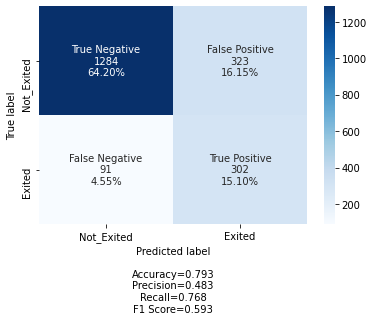

In [273]:


#Calculating the confusion matrix 
cm_h=confusion_matrix(y_test, y_pred_h)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Hyperparameter tuning is used here  to get a better accuracy but accuracy might differ each time. Other hyperparameters can also be tuned to get a better accuracy. Here, Recall of the model is slighty changed but the accuracy is slightly degraded. But still this model can be a good one. Let's name the above model as **model_h**





**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [275]:
from imblearn.over_sampling import SMOTE
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train) 
print("After UpSampling, counts of label '1': {}".format(sum(y_train==1))) 
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, counts of label '1': 6356
After UpSampling, counts of label '0': 6356 

After UpSampling, the shape of train_X: (12712, 11)
After UpSampling, the shape of train_y: (12712,) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


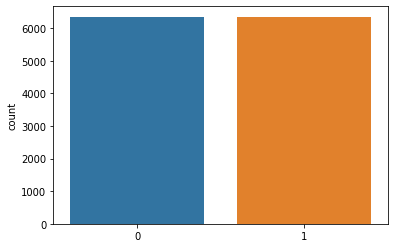

In [276]:
sns.countplot(y_train)

As you can see in the graph, Both the class have equal number of examples. Threfore, the datset is balanced now

Let's build a model with the balanced dataset

We will define  the complex model with some dropout layers added between the hidden layers which will help us to prevent overfitting

In [277]:
#Initializing, and Adding the hidden and output layers
from keras import callbacks 
model = Sequential()
model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
#Lets use dropout to prevent the overfitting 
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))
#compile model
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train,y_train,batch_size=40,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
255/255 [==============================] - 1s 2ms/step - loss: 0.5828 - accuracy: 0.6950 - val_loss: 0.6861 - val_accuracy: 0.6068
Epoch 2/100
255/255 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7735 - val_loss: 0.5877 - val_accuracy: 0.6748
Epoch 3/100
255/255 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.7935 - val_loss: 0.5632 - val_accuracy: 0.6870
Epoch 4/100
255/255 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.7971 - val_loss: 0.5641 - val_accuracy: 0.6893
Epoch 5/100
255/255 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8054 - val_loss: 0.6084 - val_accuracy: 0.6724
Epoch 6/100
255/255 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8036 - val_loss: 0.5859 - val_accuracy: 0.6811
Epoch 7/100
255/255 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8032 - val_loss: 0.5493 - val_accuracy: 0.6905

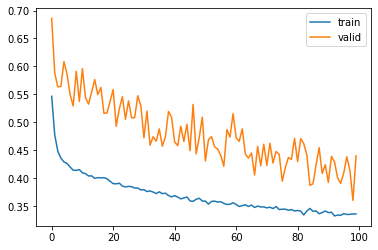

In [278]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


### Finding the optimal  threshold

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Best Threshold=0.334771, G-Mean=0.760


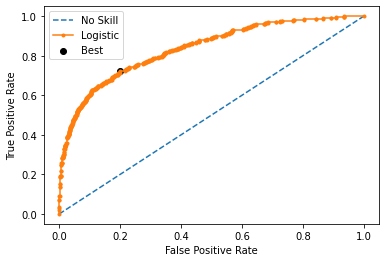

In [279]:

# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [280]:
y_pred_s = model.predict(X_test)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [281]:
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1607
           1       0.47      0.72      0.57       393

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.80      2000



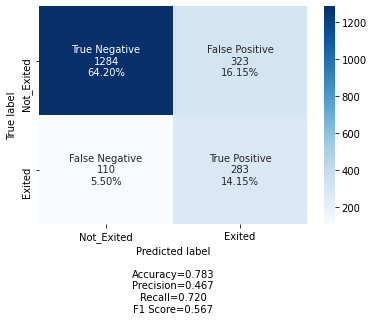

In [282]:
#Calculating the confusion matrix 
cm_s=confusion_matrix(y_test, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

As you can see, accuracy and recall of the model have suddenly dropped. Let's try  Hyperparameter optimization to increase the accuracy without expense of Recall. 



##Hyperparameter Optimization

Some important parameters to look out for while optimizing neural networks are:

-Type of architecture

-Number of Layers

-Number of Neurons in a layer

-Regularization parameters

-Learning Rate

-Type of optimization / backpropagation technique to use

-Dropout rate

-Weight sharing

##### Number of Layers:
We will keep it similar to the above model so that we can compare the accuracy.
1 hidden layer.

##### Activation:
input layer: relu becasue we are in an input layer. uses the ReLu activation function for  ϕ
output layer: sigmoid becasue we are in an output layer. uses the Sigmoid activation function for  ϕ . This is used instead of the ReLu function becasue it generates probabilities for the outcome. We want the probability that each customer leaves the bank.

##### Type of optimization / backpropagation technique to use: 
We will use Adam. Adam is a very efficeint variation of Stochastic Gradient Descent. For Adam and its variant, learning rate or the decay rate does not really matter too much.

##### Learning Rate:
default learning rate 0.001.

##### Number of Neurons in a layer:
We will keep it 6 as per our initial calculation above.

##### Weight sharing / kernel_initializer: 
uniform the distribution with which we randomly initialize weights for the nodes in this layer.

##### Loss:
loss: binary_crossentropy This is the loss function used within adam. This should be the logarthmic loss. If our dependent (output variable) is Binary, it is binary_crossentropy. If Categorical, then it is called categorical_crossentropy

Rebuilding the model using these optimised parameters

In [283]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):  
    np.random.seed(1337)
    model = Sequential()
    # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))
    #Lets use dropout to prevent the overfitting 
    model.add(Dropout(dropout_rate))
    # # Adding the hidden layer
    # Notice that we do not need to specify input dim. 
    model.add(Dense(layer_2,activation='relu'))
    # Adding dropout layer to prevent the overfitting
    model.add(Dropout(dropout_rate))
    # # Adding the output layer
    # Notice that we do not need to specify input dim. 
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

##Using Grid search

We are using grid search to optimize three hyperparameters called **drop_out rate, batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [284]:
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1)

In [285]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1],
    "dropout_rate":[0.1,0.01,0],
    
   
    
}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [286]:
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.1min finished


159/159 [==============================] - 1s 3ms/step - loss: 0.5223 - accuracy: 0.7404 - val_loss: 0.5996 - val_accuracy: 0.6740
Best: 0.694376 using {'batch_size': 64, 'dropout_rate': 0, 'lr': 0.01}


* Best model is with the following configuration:  ( It may vary each time code runs )

**Result of Grid Search**

{'batch_size': 64, 'dropout': 0, 'learning_rate":0.01}

**Heuristic for Hyperparameters**

optimizer="adam", layer1_units=64, layer2_units = 32



##Let's create the final model with above mentioned configuration

In [287]:
estimator_v2=create_model_v2(dropout_rate=grid_result.best_params_['dropout_rate'],lr=grid_result.best_params_['lr'])

estimator_v2.summary()


Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 64)                768       
_________________________________________________________________
dropout_55 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_151 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_56 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [288]:
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=25)
history_h=estimator_v2.fit(X_train, y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/100
159/159 [==============================] - 1s 3ms/step - loss: 0.5099 - accuracy: 0.7452 - val_loss: 0.5825 - val_accuracy: 0.6858
Epoch 2/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8029 - val_loss: 0.6454 - val_accuracy: 0.6410
Epoch 3/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.8031 - val_loss: 0.5047 - val_accuracy: 0.7373
Epoch 4/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8003 - val_loss: 0.6003 - val_accuracy: 0.6819
Epoch 5/100
159/159 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8173 - val_loss: 0.5745 - val_accuracy: 0.7114
Epoch 6/100
159/159 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8103 - val_loss: 0.5062 - val_accuracy: 0.7452
Epoch 7/100
159/159 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8198 - val_loss: 0.5672 - val_accuracy: 0.6905

Plotting the validation and training loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'middle'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


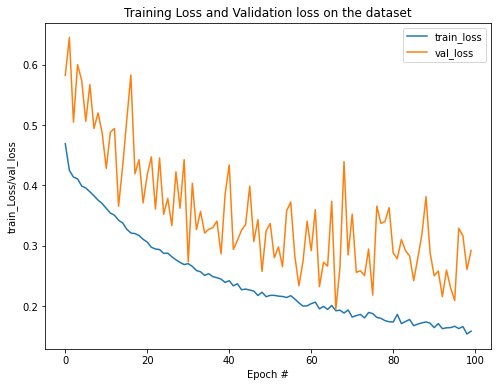

In [289]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="middle")
plt.show()

### Finding the optimal threshold 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Best Threshold=0.091651, G-Mean=0.733


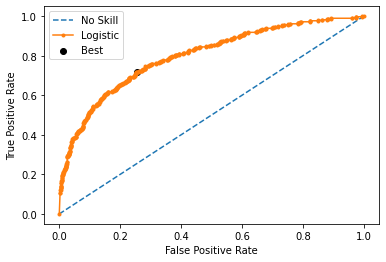

In [292]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = estimator_v2.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#### Predict the results using best threshold 

In [293]:
y_pred_h = estimator_v2.predict(X_test)
print(y_pred_h)

[[3.9762497e-02]
 [5.1094894e-08]
 [3.4928322e-04]
 ...
 [9.8157066e-01]
 [1.9789934e-02]
 [7.8018659e-01]]


In [299]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. 
# So we will use the tuned cutoff value to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [ True]]


#### Print the confusion matrix

In [300]:
#lets print classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.75      0.82      1607
           1       0.41      0.72      0.52       393

    accuracy                           0.74      2000
   macro avg       0.66      0.73      0.67      2000
weighted avg       0.82      0.74      0.76      2000



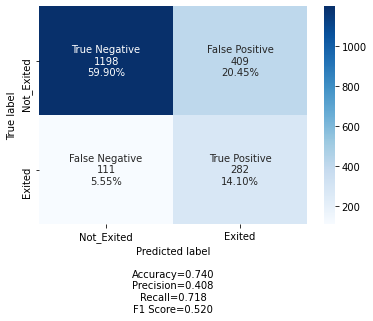

In [301]:


#Calculating the confusion matrix 
cm_h=confusion_matrix(y_test, y_pred_h)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


Oversampling using SMOTE did not help to improve the  Recall. 

Note: - ANN used on the sythesized data ( SMOTE ) was also working fine but we can not believe on this model because here we have generated the data artificially and this might also be the case that a particular data point generated in SMOTE might not make sense. Therefore, we really can not believe on a model trained on resampled data. We can try to use  cost sensitive loss function  in place of SMOTE 

So, we can choose the Final model as  **model_h** which is using dropout and  works on imbalanced dataset  

##**Conclusion:**

* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups

* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure. Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.

* The proportion of female customers churning is also greater than that of male customers
Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.


* Unsurprisingly the inactive members have a greater churn. 
Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn



#### The optimised model gives better results as seen from the confusion matrix as well as improved accuracy.


We encourage the learners to further look for optimizing the model and come up with better results.

#### Happy Learning!